import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("/content/insurance.csv")

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])

Visualizations

<Axes: >

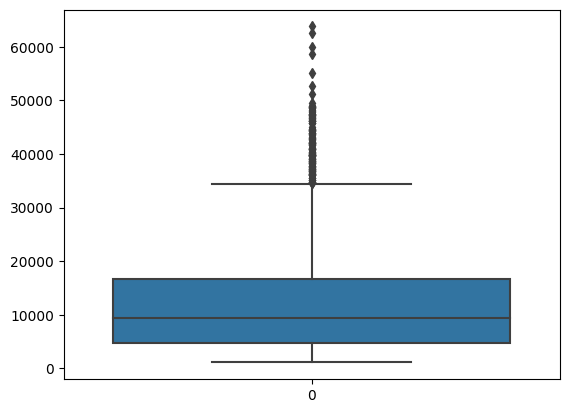

In [12]:
sns.boxplot(df['charges'])

Text(0.5, 1.0, 'The number of smokers and non-smokers (21 years old)')

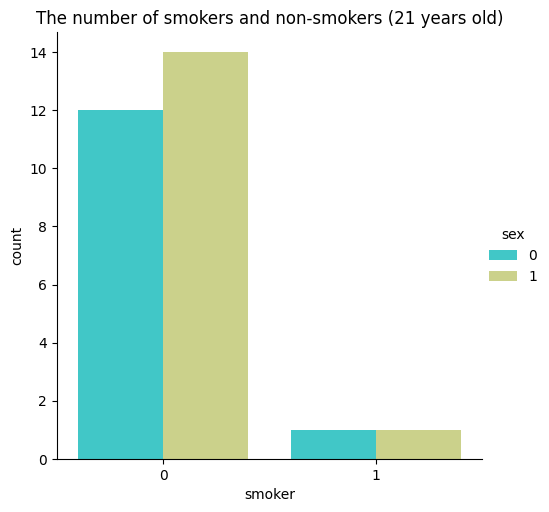

In [13]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 21)])
plt.title("The number of smokers and non-smokers (21 years old)")

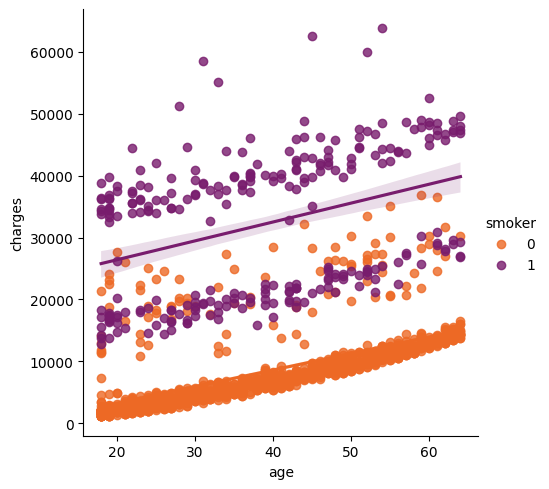

In [14]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r')

<Axes: xlabel='charges', ylabel='Count'>

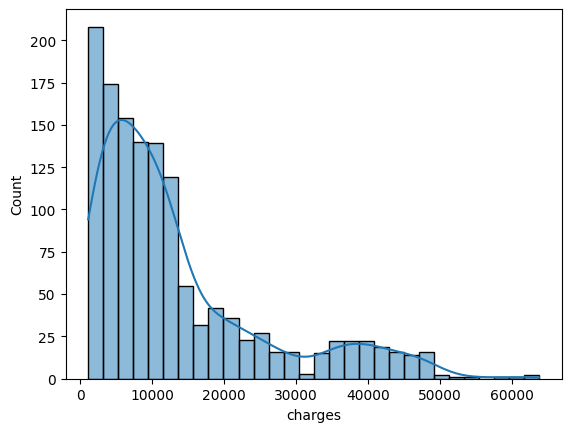

In [15]:
sns.histplot(data=df,x='charges',kde=True)

<ipython-input-7-1557a48404fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

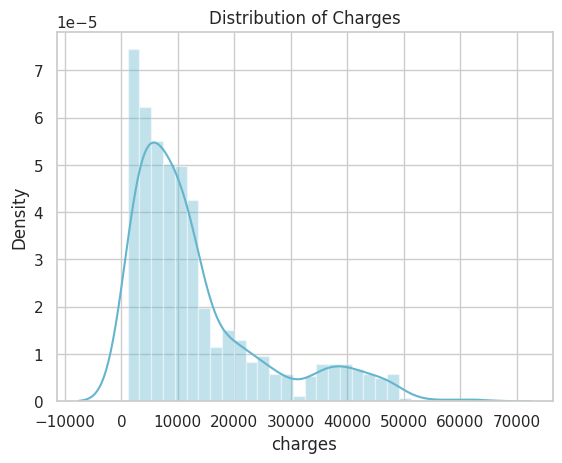

In [16]:
sns.set(style='whitegrid')
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

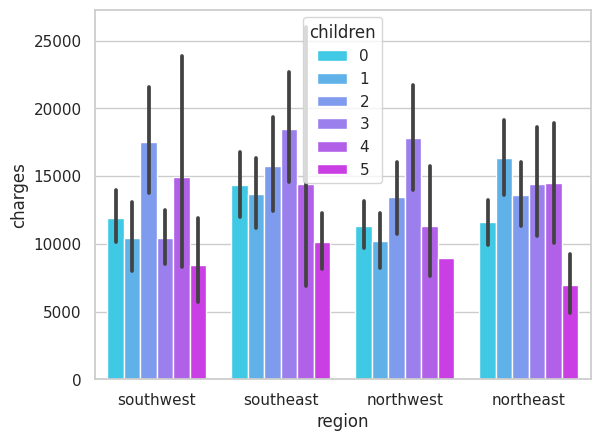

In [17]:
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='cool')


In [18]:
df['region']= label_encoder.fit_transform(df['region'])

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<Axes: >

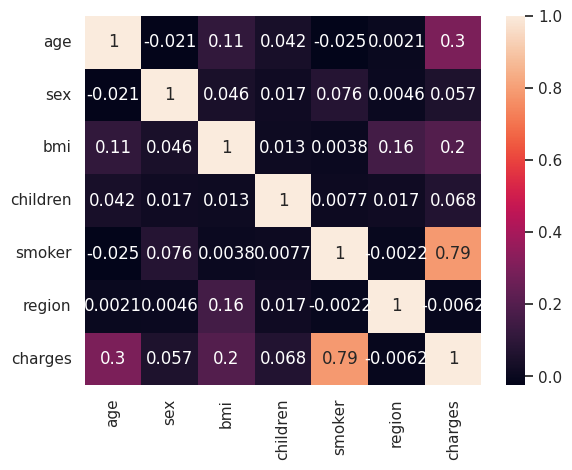

In [20]:
sns.heatmap(df.corr(),annot=True)

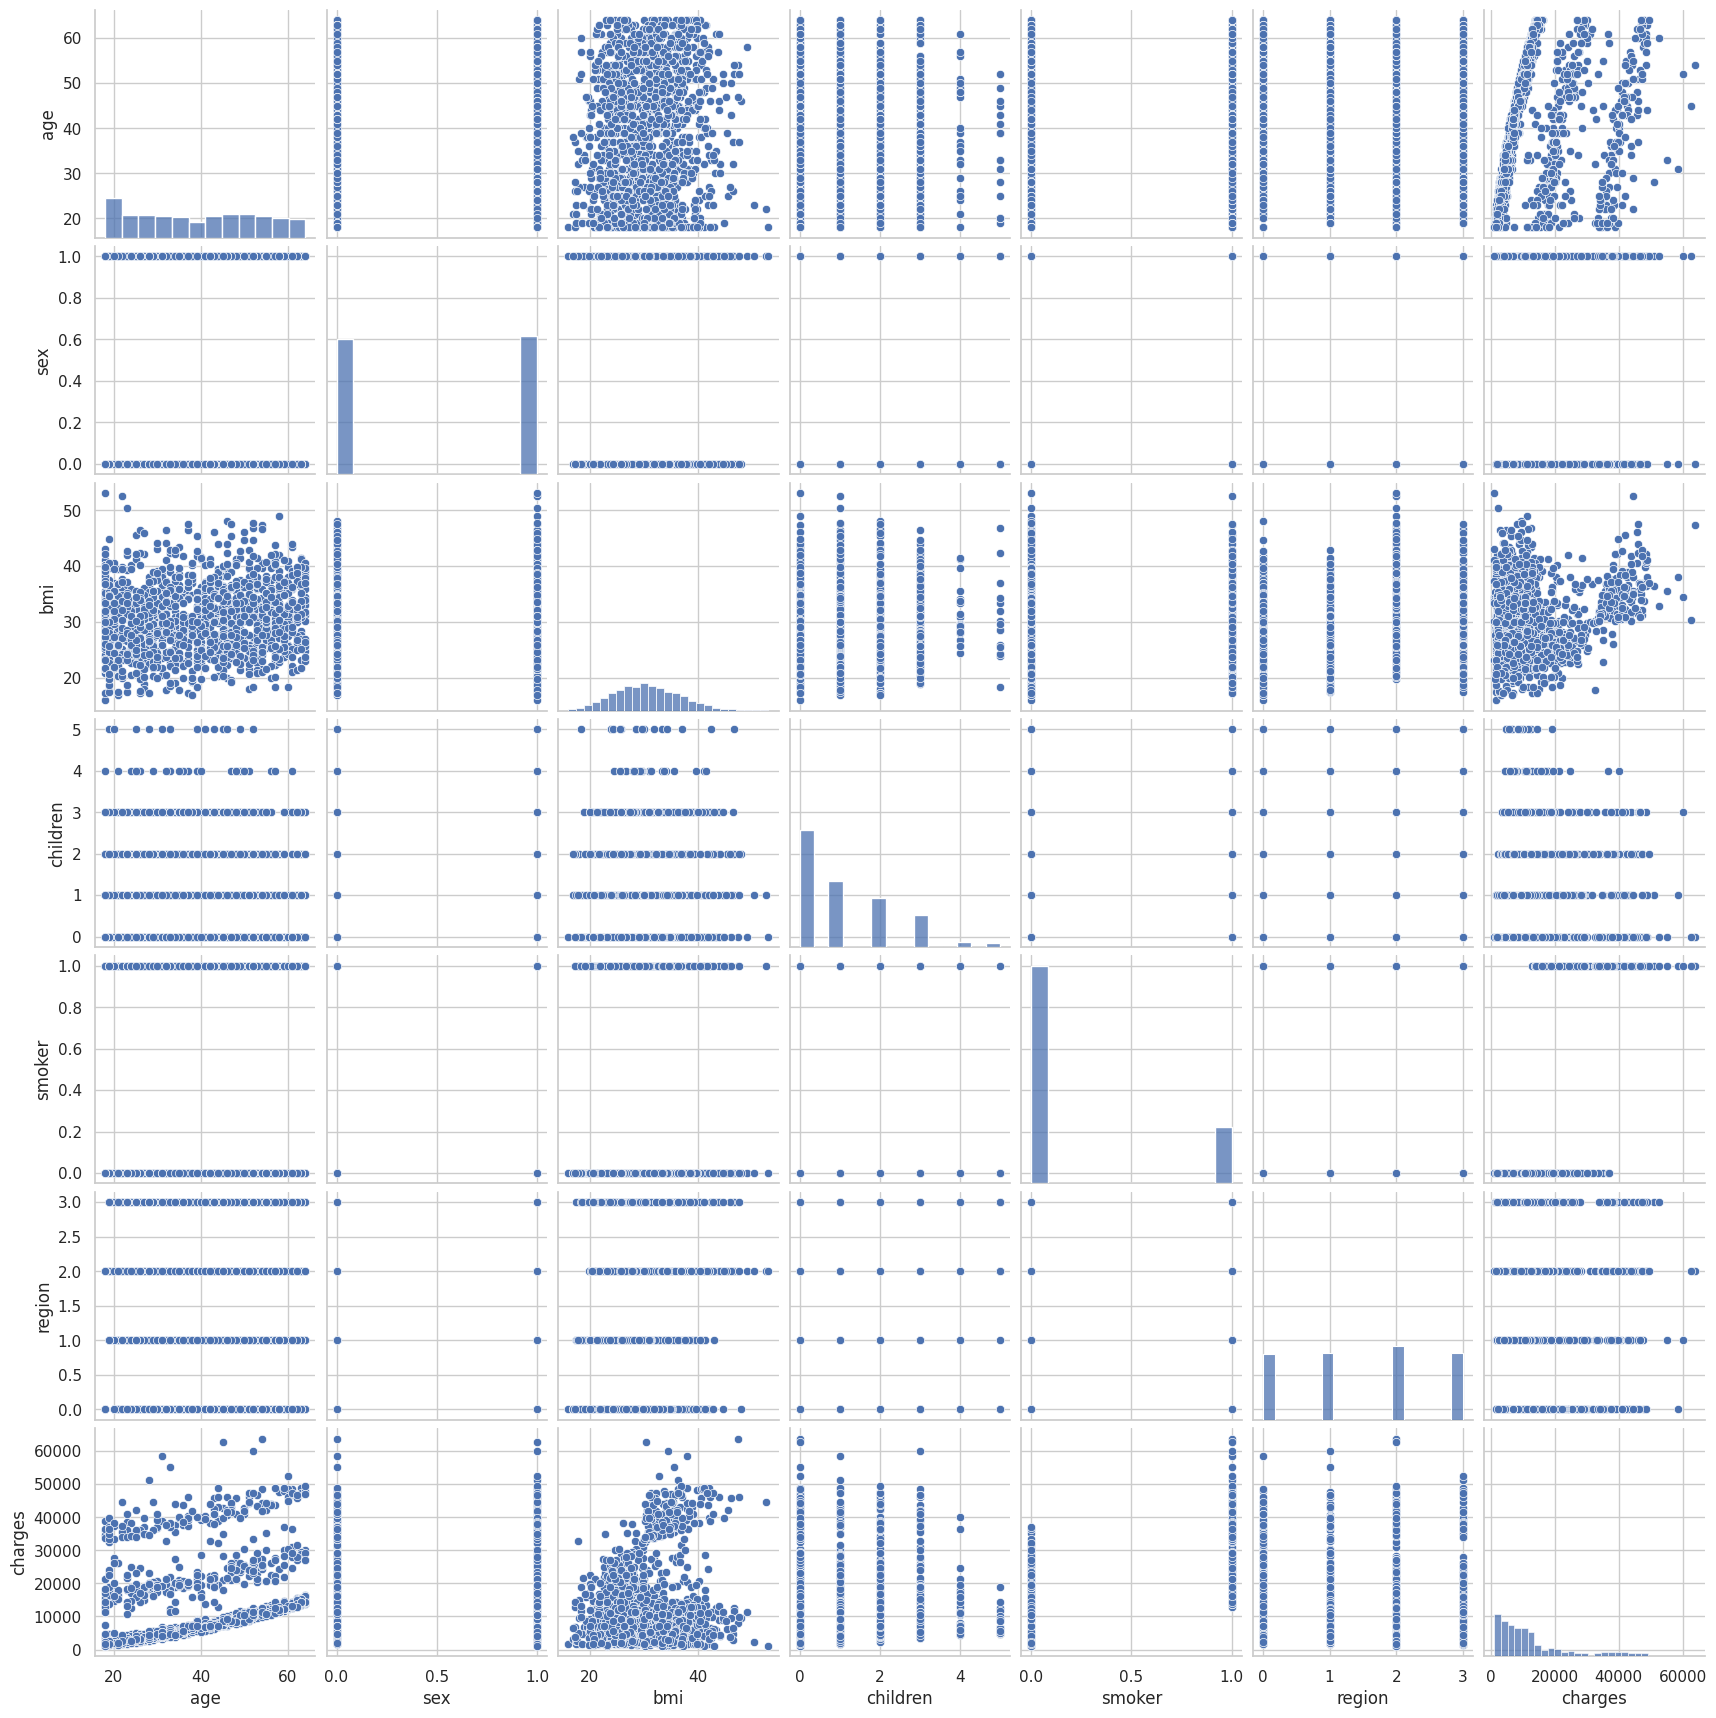

In [21]:
sns.pairplot(df)

In [22]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


models = {
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Score is {model.score(x_test, y_test)}')


    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')



Training Model LR 
-----------------------------------------------
Score is 0.7833463107364539
Training R-squared: 0.7417049283233981
Testing R-squared: 0.7833463107364539
Mean Squared Error: 33635210.431178406
Mean Absolute Error: 4186.508898366435
Training Model RF 
-----------------------------------------------
Score is 0.8742036056774115
Training R-squared: 0.9256869375403096
Testing R-squared: 0.8742036056774115
Mean Squared Error: 19529730.644820802
Mean Absolute Error: 2441.915658292361
Training Model DT 
-----------------------------------------------
Score is 0.7230294213823747
Training R-squared: 0.9983078124756305
Testing R-squared: 0.7230294213823747
Mean Squared Error: 42999330.990928866
Mean Absolute Error: 3037.8147583432838
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.8408647013528231
Training R-squared: 0.9927812965590004
Testing R-squared: 0.8408647013528231
Mean Squared Error: 24705553.25053876
Mean Absolute Error: 2614

Now We Go To Choose Max Depth

In [24]:
max_depth_values = [1,2,3,4,5,6,7,8]
train_accuracy_values =[]
for max_depth_val in max_depth_values:
    model = RandomForestRegressor(max_depth=max_depth_val,random_state = 2)
    model.fit(x_train, y_train)
    y_pred =model.predict(x_train)
    acc_train=model.score(x_test,y_test)
    train_accuracy_values.append(acc_train)

In [25]:
train_accuracy_values

[0.6608048922770777,
 0.8417933495550463,
 0.8675746825596274,
 0.872677170478934,
 0.8753239247794342,
 0.8755309603734038,
 0.8729311378096285,
 0.8711685231482463]

In [26]:
final_model = RandomForestRegressor(max_depth=6,random_state = 0)
final_model.fit(x_train, y_train)


RandomForestRegressor(max_depth=6, random_state=0)

Model Evalulation

In [27]:
forest_train_pred = final_model.predict(x_train)
forest_test_pred = final_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 13740918.931, MSE test data: 19845744.977
R2 train data: 0.905, R2 test data: 0.872


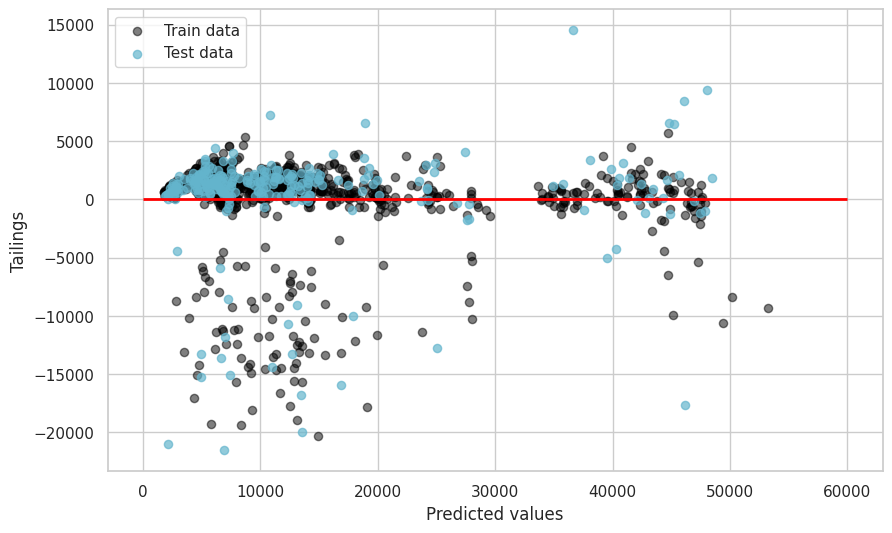

In [28]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

Try LinearRegression & PolynomialFeatures

In [29]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7833463107364539


In [30]:
from sklearn.preprocessing import PolynomialFeatures


X = df.drop(['charges','region'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147233
